# [7주차] 나의 첫 예측 모델: 선형 회귀 실습 🤖

안녕하세요! 7주차 수업에 오신 것을 환영합니다.  
지난 4주간 파이썬 기초를 배웠으니, 이제 직접 머신러닝 모델을 만들어 보겠습니다.

1주차에 이론으로 배웠던 **선형 회귀**를 기억하시나요?  
Cost를 최소화하여 최적의 직선(W, b)을 찾는 과정이었습니다.

오늘은 **`scikit-learn`** 라이브러리를 사용해서  
이 모든 과정을 코드로 직접 구현해 보겠습니다.

## 🛠️ 모듈 1: 머신러닝 프로젝트의 전체 그림

1주차에 우리는 Cost를 최소화하는 최적의 W와 b를 찾기 위해  
여러 후보 직선들을 직접 비교해보았습니다.

`scikit-learn`은 이 복잡한 최적화 과정을  
`model.fit()` 이라는 간단한 명령어 하나로 해결해줍니다.

**표준 머신러닝 작업 순서 (Workflow)**:  
앞으로 우리가 진행할 모든 머신러닝 프로젝트에서 따를 표준 흐름입니다.  
이 5단계를 꼭 기억해주시기 바랍니다.

1.  **데이터 준비 (Prepare Data)**
2.  **데이터 분리 (Split Data)**
3.  **모델 학습 (Train Model)**
4.  **성능 평가 (Evaluate Model)**
5.  **(활용) 예측 (Predict)**

## 🚀 모듈 2: 단계별 선형 회귀 모델링

캘리포니아 주택 가격 데이터를 사용하여 모델링을 진행합니다.

**"평균 방 개수가 주택 가격에 어떤 영향을 미치는가?"**

이 질문에 답하는 예측 모델을 단계별로 함께 만들어 보겠습니다.

### 1단계: 데이터 준비

가장 먼저, 분석에 필요한 도구(라이브러리)와
데이터를 불러와야 합니다.

In [1]:
# 필요한 라이브러리들을 불러옵니다.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# scikit-learn에 내장된 데이터를 불러옵니다.
housing = fetch_california_housing()

데이터가 로드되었습니다.  
이제 이 데이터셋에서 우리가 사용할
**'문제(X)'** 와 **'정답(y)'** 을 지정해야 합니다.

- **문제(X)**: '평균 방 개수 (AveRooms)'
- **정답(y)**: '주택 가격 중앙값 (MedHouseVal)'

### [보충] scikit-learn 모델이 요구하는 데이터 형태

모델에 데이터를 입력하기 전에,
scikit-learn의 기본 설계 원칙을 이해해야 합니다.

**1. 기본 방정식 (Scalar → Scalar)**  
우리가 아는 직선의 방정식은 $y = wx + b$ 입니다.  
하나의 입력($x$)이 하나의 출력($y$)을 만듭니다.
- `x = 10` (10시간 공부) → `y = 95` (95점)

**2. 여러 데이터 처리 (Vector → Vector)**  
하지만 실제 데이터는 여러 개입니다.  
따라서 입력($x$)과 출력($y$)은 여러 값을 담은
**벡터(1차원 배열)**가 됩니다.

- `X = [10, 5, 8]` → `y = [95, 70, 88]`

**3. 여러 특징 처리 (Matrix → Vector)**  
더 나아가, '공부 시간' 외에 '수면 시간'이라는
특징이 추가되면 입력은 어떻게 될까요?  
입력은 **행렬(Matrix, 2차원 배열)**이 됩니다.

- **X (입력 행렬)**:
  - `[[10, 8],`  (학생1: 공부 10, 수면 8)
  - ` [ 5, 6],`  (학생2: 공부 5, 수면 6)
  - ` [ 8, 9]]`  (학생3: 공부 8, 수면 9)
- **y (출력 벡터)**:
  - `[95, 70, 88]`

**scikit-learn의 경우**:  
가장 일반적인 **3번 케이스(Matrix → Vector)** 를 기본으로 설계되었습니다.  
모델의 입력 `X`는 항상
**(데이터 개수, 특징 개수)** 형태의 **2차원 배열**이어야 합니다.

- `(n_samples, n_features)`

이것이 우리가 특징을 하나만 사용하더라도,  
`n_features`를 1로 갖는 2차원 배열로 만들어야 하는 이유입니다.

위의 설명에 따라, 이제 데이터셋에서  
우리가 사용할 **'문제(X)'** 와 **'정답(y)'** 을 올바른 형태로 지정하겠습니다.

In [10]:
# housing.data[:, 2] -> (20640,) shape의 1D 벡터
# housing.data[:, 2:3] -> (20640, 1) shape의 2D 행렬

# 'AveRooms' 특징(5번 인덱스)을 2D 배열 형태로 추출
X = housing.data[:, 2:3]
y = housing.target

데이터를 모델에 넣기 전에,  
우리의 가설(**"방 개수와 가격은 선형 관계일 것이다"**)이
타당한지  
눈으로 직접 확인하는 것이 좋습니다.

이를 **데이터 탐색(Exploratory Data Analysis, EDA)** 이라고 하며,  
시각화는 가장 기본적인 탐색 방법입니다.

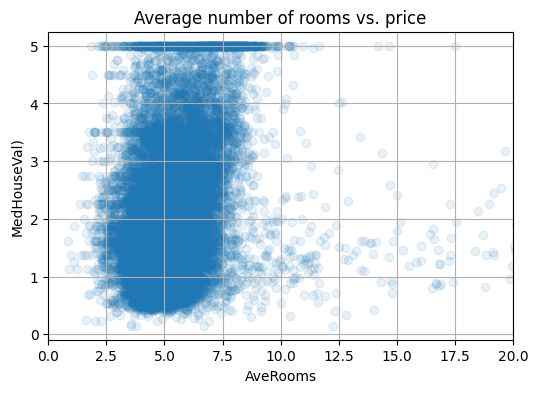

선형 관계일까??


In [24]:
# 산점도(scatter plot)로 데이터의 관계를 확인
plt.figure(figsize=(6, 4))
plt.scatter(X, y, alpha=0.1)

plt.title("Average number of rooms vs. price")
plt.xlim(0,20)
plt.xlabel("AveRooms")
plt.ylabel("MedHouseVal)")
plt.grid(True)
plt.show()

print("선형 관계일까??")

### 2단계: 데이터 분리

이제 모델링을 준비할 차례입니다.  
1주차에 배운 것처럼,  
모델의 진짜 실력을 평가하려면 데이터를 **'연습 문제'** 와 **'실전 시험'** 으로 나눠야 합니다.  
`train_test_split` 함수를 사용합니다.

In [20]:
# 데이터를 8:2 비율로 분리
# random_state=42 : 재현성을 위해 랜덤 시드를 고정
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"연습 문제 개수: {len(X_train)}개")
print(f"실전 시험 개수: {len(X_test)}개")

연습 문제 개수: 16512개
실전 시험 개수: 4128개


### 3단계: 모델 학습

데이터 준비가 끝났습니다.  
이제 `scikit-learn`의 `LinearRegression` 모델을 불러와  
'연습 문제' 데이터로 학습시켜 보겠습니다.

`model.fit()` 함수가 바로 이 '학습'을 수행합니다.

In [21]:
# 1. 선형 회귀 모델 객체(인스턴스) 생성
model = LinearRegression()

# 2. '연습 문제'로 모델 학습 (fit)
# 이 코드가 최적의 W와 b를 자동으로 찾아줍니다.
model.fit(X_train, y_train)

print("모델 학습이 완료되었습니다!")

모델 학습이 완료되었습니다!


'학습'이 끝났다는 것은,  
모델이 최적의 기울기($W$)와 절편($b$)을 찾았다는 의미입니다.

`model.coef_`와 `model.intercept_`로
학습된 결과를 확인할 수 있습니다.

In [22]:
# 학습된 모델이 찾은 최적의 W와 b 확인
W = model.coef_[0]
b = model.intercept_

print(f"학습된 기울기(W): {W:.4f}")
print(f"학습된 절편(b): {b:.4f}")
print(f"\n=> 최종 모델: y = {W:.4f} * x + {b:.4f}")

학습된 기울기(W): 0.0768
학습된 절편(b): 1.6548

=> 최종 모델: y = 0.0768 * x + 1.6548


## 💯 모듈 3: 그래서 이 모델, 얼마나 좋을까?

- **R-squared (R², 결정 계수)**:
  회귀 모델의 성능을 평가하는 대표 지표입니다.

- **의미**: 모델이 데이터의 변동성을
  **몇 퍼센트나 설명하는지**를 나타냅니다.
  - $R^2 = 1.0$ 이면 완벽한 설명 (100%)
  - $R^2 = 0.0$ 이면 전혀 설명 못함 (0%)

- **`model.score()`**:
  **'실전 시험(Test set)'** 데이터로
  R² 값을 계산하여 일반화 성능을 평가합니다.

- **`model.predict()`**:
  학습된 모델을 사용하여
  **새로운 데이터**에 대한 예측값을 얻습니다.
  
### 4단계: 성능 평가

모델이 최적의 공식을 찾았습니다.  
하지만 이 모델이 얼마나 쓸모있는지, 객관적인 점수로 평가해야 합니다.

회귀 모델은 **R-squared(결정계수)** 로 평가하며, **'실전 시험' 데이터** 를 사용합니다.

일반적으로 결정계수의 **크기**가 0.3 이상이면,  
회귀 모델이 어느정도 적합하다고 판단합니다.

In [23]:
# '실전 시험' 데이터로 모델의 R-squared 점수 평가
r2_score = model.score(X_test, y_test)

print(f"모델의 R-squared 점수: {r2_score:.4f}")
print(f"\n=> 우리 모델은 방 개수만으로")
print(f"   주택 가격 변동의 약 {r2_score*100:.2f}%를 설명합니다.")

모델의 R-squared 점수: 0.0138

=> 우리 모델은 방 개수만으로
   주택 가격 변동의 약 1.38%를 설명합니다.


평가 점수를 확인했으니,  
모델이 학습한 직선이 데이터를 얼마나 잘 설명하는지 직접 그려봅시다.

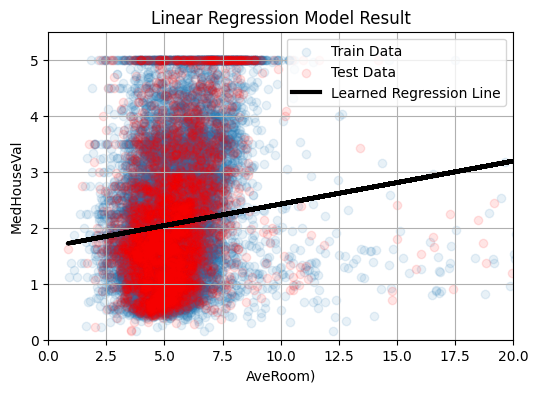

In [31]:
# 시각화로 최종 결과 확인
plt.figure(figsize=(6, 4))

# 실제 데이터 산점도
plt.scatter(X_train, y_train, alpha=0.1, label='Train Data')
plt.scatter(X_test, y_test, alpha=0.1,
            label='Test Data', color='red')

# 모델이 학습한 최적의 직선
plt.plot(X, model.predict(X), color='black',
         linewidth=3, label='Learned Regression Line')
plt.xlim(0, 20)
plt.ylim(0, 5.5)
plt.title("Linear Regression Model Result")
plt.xlabel("AveRoom)")
plt.ylabel("MedHouseVal")
plt.legend()
plt.grid(True)
plt.show()

### 5단계: 예측

잘 훈련되고 검증된 모델의 최종 목적은
**새로운 데이터에 대한 예측**입니다.

`model.predict()` 함수를 사용하여
미래의 값을 예측해 보겠습니다.

In [32]:
# 만약 평균 방 개수가 5개인 집이 있다면?
# 모델 입력은 항상 2D 배열 형태여야 합니다.
new_house_rooms = np.array([[5]])
predicted_price = model.predict(new_house_rooms)

print(f"방 5개 집의 예측 가격: ${predicted_price[0] * 100000:,.2f}")
print(f"(단위 변환 전 값: {predicted_price[0]:.2f})")

방 5개 집의 예측 가격: $203,854.02
(단위 변환 전 값: 2.04)


```

































```



































